0. Import the data and declare your package dependencies.

In [513]:
import numpy as np
import pandas as pd
import plotnine as p9

## 1. Briefly describe the data set. What information does it contain?

In [514]:
avocado = pd.read_csv("../Data/avocado-updated-2020.csv") #load the avocado dataset and create variable avocado containing all data

print(avocado.head()) #preview of dataset

print(avocado.describe()) #generate statistical summaries for numeric columns 

print(avocado.columns) #lists all columns in dataset

         date  average_price  ...  year             geography
0  2015-01-04           1.22  ...  2015                Albany
1  2015-01-04           1.79  ...  2015                Albany
2  2015-01-04           1.00  ...  2015               Atlanta
3  2015-01-04           1.76  ...  2015               Atlanta
4  2015-01-04           1.08  ...  2015  Baltimore/Washington

[5 rows x 13 columns]
       average_price  total_volume  ...   xlarge_bags          year
count   33045.000000  3.304500e+04  ...  3.304500e+04  33045.000000
mean        1.379941  9.683997e+05  ...  7.742585e+03   2017.460887
std         0.378972  3.934533e+06  ...  4.819803e+04      1.699747
min         0.440000  8.456000e+01  ...  0.000000e+00   2015.000000
25%         1.100000  1.511895e+04  ...  0.000000e+00   2016.000000
50%         1.350000  1.291170e+05  ...  0.000000e+00   2017.000000
75%         1.620000  5.058285e+05  ...  8.044400e+02   2019.000000
max         3.250000  6.371614e+07  ...  1.403184e+06   2020.

In [515]:
avocado.dtypes

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

## 2. Clean the data in any way you see fit. 

In [516]:
avocado_clean = avocado.copy()
avocado_clean['date'] = pd.to_datetime(avocado_clean['date']) #converts 'date' column from string to datetime format

avocado_clean

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [517]:
# Rename variables to make sense intuitively. Example: what does 4046 mean in terms of size of avocado?

avocado_clean = avocado_clean.rename(columns={
    "4046": "small_haas",
    "4225": "large_haas",
    "4770": "xlarge_haas",
    "geography": "region"
})

print(avocado_clean)

            date  average_price  ...  year                region
0     2015-01-04           1.22  ...  2015                Albany
1     2015-01-04           1.79  ...  2015                Albany
2     2015-01-04           1.00  ...  2015               Atlanta
3     2015-01-04           1.76  ...  2015               Atlanta
4     2015-01-04           1.08  ...  2015  Baltimore/Washington
...          ...            ...  ...   ...                   ...
33040 2020-11-29           1.47  ...  2020            Total U.S.
33041 2020-11-29           0.91  ...  2020                  West
33042 2020-11-29           1.48  ...  2020                  West
33043 2020-11-29           0.67  ...  2020   West Tex/New Mexico
33044 2020-11-29           1.35  ...  2020   West Tex/New Mexico

[33045 rows x 13 columns]


In [518]:
all_regions = avocado["geography"].unique() #lists all unique values in geography column
print(f"Total distinct geographical regions (raw data): {all_regions}")

Total distinct geographical regions (raw data): ['Albany' 'Atlanta' 'Baltimore/Washington' 'Boise' 'Boston' 'Buffalo/Rochester'
 'California' 'Charlotte' 'Chicago' 'Cincinnati/Dayton' 'Columbus'
 'Dallas/Ft. Worth' 'Denver' 'Detroit' 'Grand Rapids' 'Great Lakes'
 'Harrisburg/Scranton' 'Hartford/Springfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'Las Vegas' 'Los Angeles' 'Louisville' 'Miami/Ft. Lauderdale'
 'Midsouth' 'Nashville' 'New Orleans/Mobile' 'New York' 'Northeast'
 'Northern New England' 'Orlando' 'Philadelphia' 'Phoenix/Tucson' 'Pittsburgh'
 'Plains' 'Portland' 'Raleigh/Greensboro' 'Richmond/Norfolk' 'Roanoke'
 'Sacramento' 'San Diego' 'San Francisco' 'Seattle' 'South Carolina'
 'South Central' 'Southeast' 'Spokane' 'St. Louis' 'Syracuse' 'Tampa'
 'Total U.S.' 'West' 'West Tex/New Mexico']


In [519]:
# Geographical region handling
major_aggregates = [
    'Total U.S.', 'West', 'South', 'Northeast', 'Midsouth', 'Southeast', 'GreatLakes', 'Plains', 'SouthCentral', 'California'
]

#Filter out aggregate regions, only include individual cities

avocado_clean = avocado_clean[~avocado_clean['region'].isin(major_aggregates)] 

print(avocado_clean)

            date  average_price  ...  year                region
0     2015-01-04           1.22  ...  2015                Albany
1     2015-01-04           1.79  ...  2015                Albany
2     2015-01-04           1.00  ...  2015               Atlanta
3     2015-01-04           1.76  ...  2015               Atlanta
4     2015-01-04           1.08  ...  2015  Baltimore/Washington
...          ...            ...  ...   ...                   ...
33036 2020-11-29           1.46  ...  2020              Syracuse
33037 2020-11-29           0.65  ...  2020                 Tampa
33038 2020-11-29           0.95  ...  2020                 Tampa
33043 2020-11-29           0.67  ...  2020   West Tex/New Mexico
33044 2020-11-29           1.35  ...  2020   West Tex/New Mexico

[28761 rows x 13 columns]


## 3. Which major geographical region sold the most total organic, small Hass avocados in 2017?

In [520]:
avocado_2017 = avocado_clean[avocado_clean["year"] == 2017]
organic_2017 = avocado_2017[avocado_2017["type"] == "organic"]
organic_2017

,date,average_price,total_volume,small_haas,large_haas,xlarge_haas,total_bags,small_bags,large_bags,xlarge_bags,type,year,region
11232,2017-01-01,1.87,1376.70,71.65,192.63,0.00,1112.42,1112.42,0.00,0.0,organic,2017,Albany
11234,2017-01-01,1.81,5342.85,956.73,2862.95,0.00,1523.17,5.55,1517.62,0.0,organic,2017,Atlanta
11236,2017-01-01,1.92,13901.46,1420.47,6298.07,325.44,5857.48,5857.48,0.00,0.0,organic,2017,Baltimore/Washington
11238,2017-01-01,1.05,2823.82,0.00,368.63,0.00,2455.19,577.91,1877.28,0.0,organic,2017,Boise
11240,2017-01-01,2.06,13438.22,14.80,2181.53,0.00,11241.89,10636.25,605.64,0.0,organic,2017,Boston
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16940,2017-12-31,1.82,2468.87,251.57,692.89,0.00,1524.41,426.67,1097.74,0.0,organic,2017,Spokane
16942,2017-12-31,1.54,12274.98,1689.61,1140.91,0.00,9444.46,6613.72,2830.74,0.0,organic,2017,St. Louis
16944,2017-12-31,1.20,4873.10,51.97,54.57,0.00,4766.56,3051.42,1715.14,0.0,organic,2017,Syracuse
16946,2017-12-31,1.59,5528.74,76.28,474.42,0.00,4978.04,4716.25,261.79,0.0,organic,2017,Tampa


In [521]:

regional_total = organic_2017.groupby("region")["small_haas"].sum()
top_region = regional_total.idxmax()
top_sales = regional_total.max()

print(f"The region with the most organic small Hass avocado sales in 2017 is: {top_region}")
print(f"Total sales: {top_sales:,.2f}")

The region with the most organic small Hass avocado sales in 2017 is: South Central
Total sales: 1,717,104.19


## 4. Split the `date` variable into month, day, and year variables. In which month is the highest average volume of avocado sales?

In [522]:
# Split the date variable into month, day, and year
# Year already exists in separate column
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day
print(avocado_clean)

            date  average_price  total_volume  ...                region  month  day
0     2015-01-04           1.22      40873.28  ...                Albany      1    4
1     2015-01-04           1.79       1373.95  ...                Albany      1    4
2     2015-01-04           1.00     435021.49  ...               Atlanta      1    4
3     2015-01-04           1.76       3846.69  ...               Atlanta      1    4
4     2015-01-04           1.08     788025.06  ...  Baltimore/Washington      1    4
...          ...            ...           ...  ...                   ...    ...  ...
33036 2020-11-29           1.46       3191.59  ...              Syracuse     11   29
33037 2020-11-29           0.65     562437.35  ...                 Tampa     11   29
33038 2020-11-29           0.95      11883.88  ...                 Tampa     11   29
33043 2020-11-29           0.67     822818.75  ...   West Tex/New Mexico     11   29
33044 2020-11-29           1.35      24106.58  ...   West Tex/New

In [523]:
# Calculate average volume by month
monthly_avg_volume = avocado_clean.groupby('month')['total_volume'].mean()

In [524]:
# Find the month with highest average volume
highest_month_num = monthly_avg_volume.idxmax()
highest_volume = monthly_avg_volume.max()

print(highest_month_num)
print(highest_volume)

5
447827.25275807723


In [525]:
# Create a month name mapping for better readability
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 
               5: 'May', 6: 'June', 7: 'July', 8: 'August',
               9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Show all months sorted by average volume
print("\nAverage volume by month:")
monthly_avg_volume.sort_values(ascending=False)


Average volume by month:


month
5     447827.252758
2     433848.824184
6     419324.521090
4     406113.298191
3     396150.429917
1     391094.090165
7     390416.085201
8     378708.686772
9     363469.514218
10    339180.084709
11    330184.689505
12    324035.473289
Name: total_volume, dtype: float64

In [526]:
print(f"The month with the highest average volume of avocado sales is: {month_names[highest_month_num]} (Month {highest_month_num})")
print(f"Average volume: {highest_volume:,.2f}")


The month with the highest average volume of avocado sales is: May (Month 5)
Average volume: 447,827.25


## 5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five
## metro geographical regions with the highest averages for the `total_volume` variable.

In [527]:
# Calculate the average total volume for each region

region_volume_mean = avocado_clean.groupby('region')['total_volume'].mean()

region_volume_mean


region
Albany                  5.688944e+04
Atlanta                 3.251538e+05
Baltimore/Washington    4.522298e+05
Boise                   4.960711e+04
Boston                  3.335499e+05
Buffalo/Rochester       8.366164e+04
Charlotte               1.328125e+05
Chicago                 4.210213e+05
Cincinnati/Dayton       1.515242e+05
Columbus                1.077398e+05
Dallas/Ft. Worth        7.127519e+05
Denver                  4.541332e+05
Detroit                 2.287954e+05
Grand Rapids            9.635588e+04
Great Lakes             1.994197e+06
Harrisburg/Scranton     1.535562e+05
Hartford/Springfield    1.709231e+05
Houston                 6.876533e+05
Indianapolis            1.085063e+05
Jacksonville            1.016462e+05
Las Vegas               1.778607e+05
Los Angeles             1.567566e+06
Louisville              5.701417e+04
Miami/Ft. Lauderdale    3.786681e+05
Nashville               1.265584e+05
New Orleans/Mobile      1.546839e+05
New York                8.63145

In [528]:
# Find the top 5 regions with the highest average total volume 
# Use .nlargest(5) to get the top 5 means, and .index to grab the region names

top_5_regions = region_volume_mean.nlargest(5).index.tolist()
top_5_regions

['South Central', 'Great Lakes', 'Los Angeles', 'New York', 'Dallas/Ft. Worth']

In [529]:
print(f"The five metro areas with the highest average total volume are: {top_5_regions}")

# Filter the original clean data to include only the top 5 regions
# Use the .isin() method, which is quick and effective for filtering

avocado_top_5_filter = avocado_clean[avocado_clean['region'].isin(top_5_regions)]

The five metro areas with the highest average total volume are: ['South Central', 'Great Lakes', 'Los Angeles', 'New York', 'Dallas/Ft. Worth']


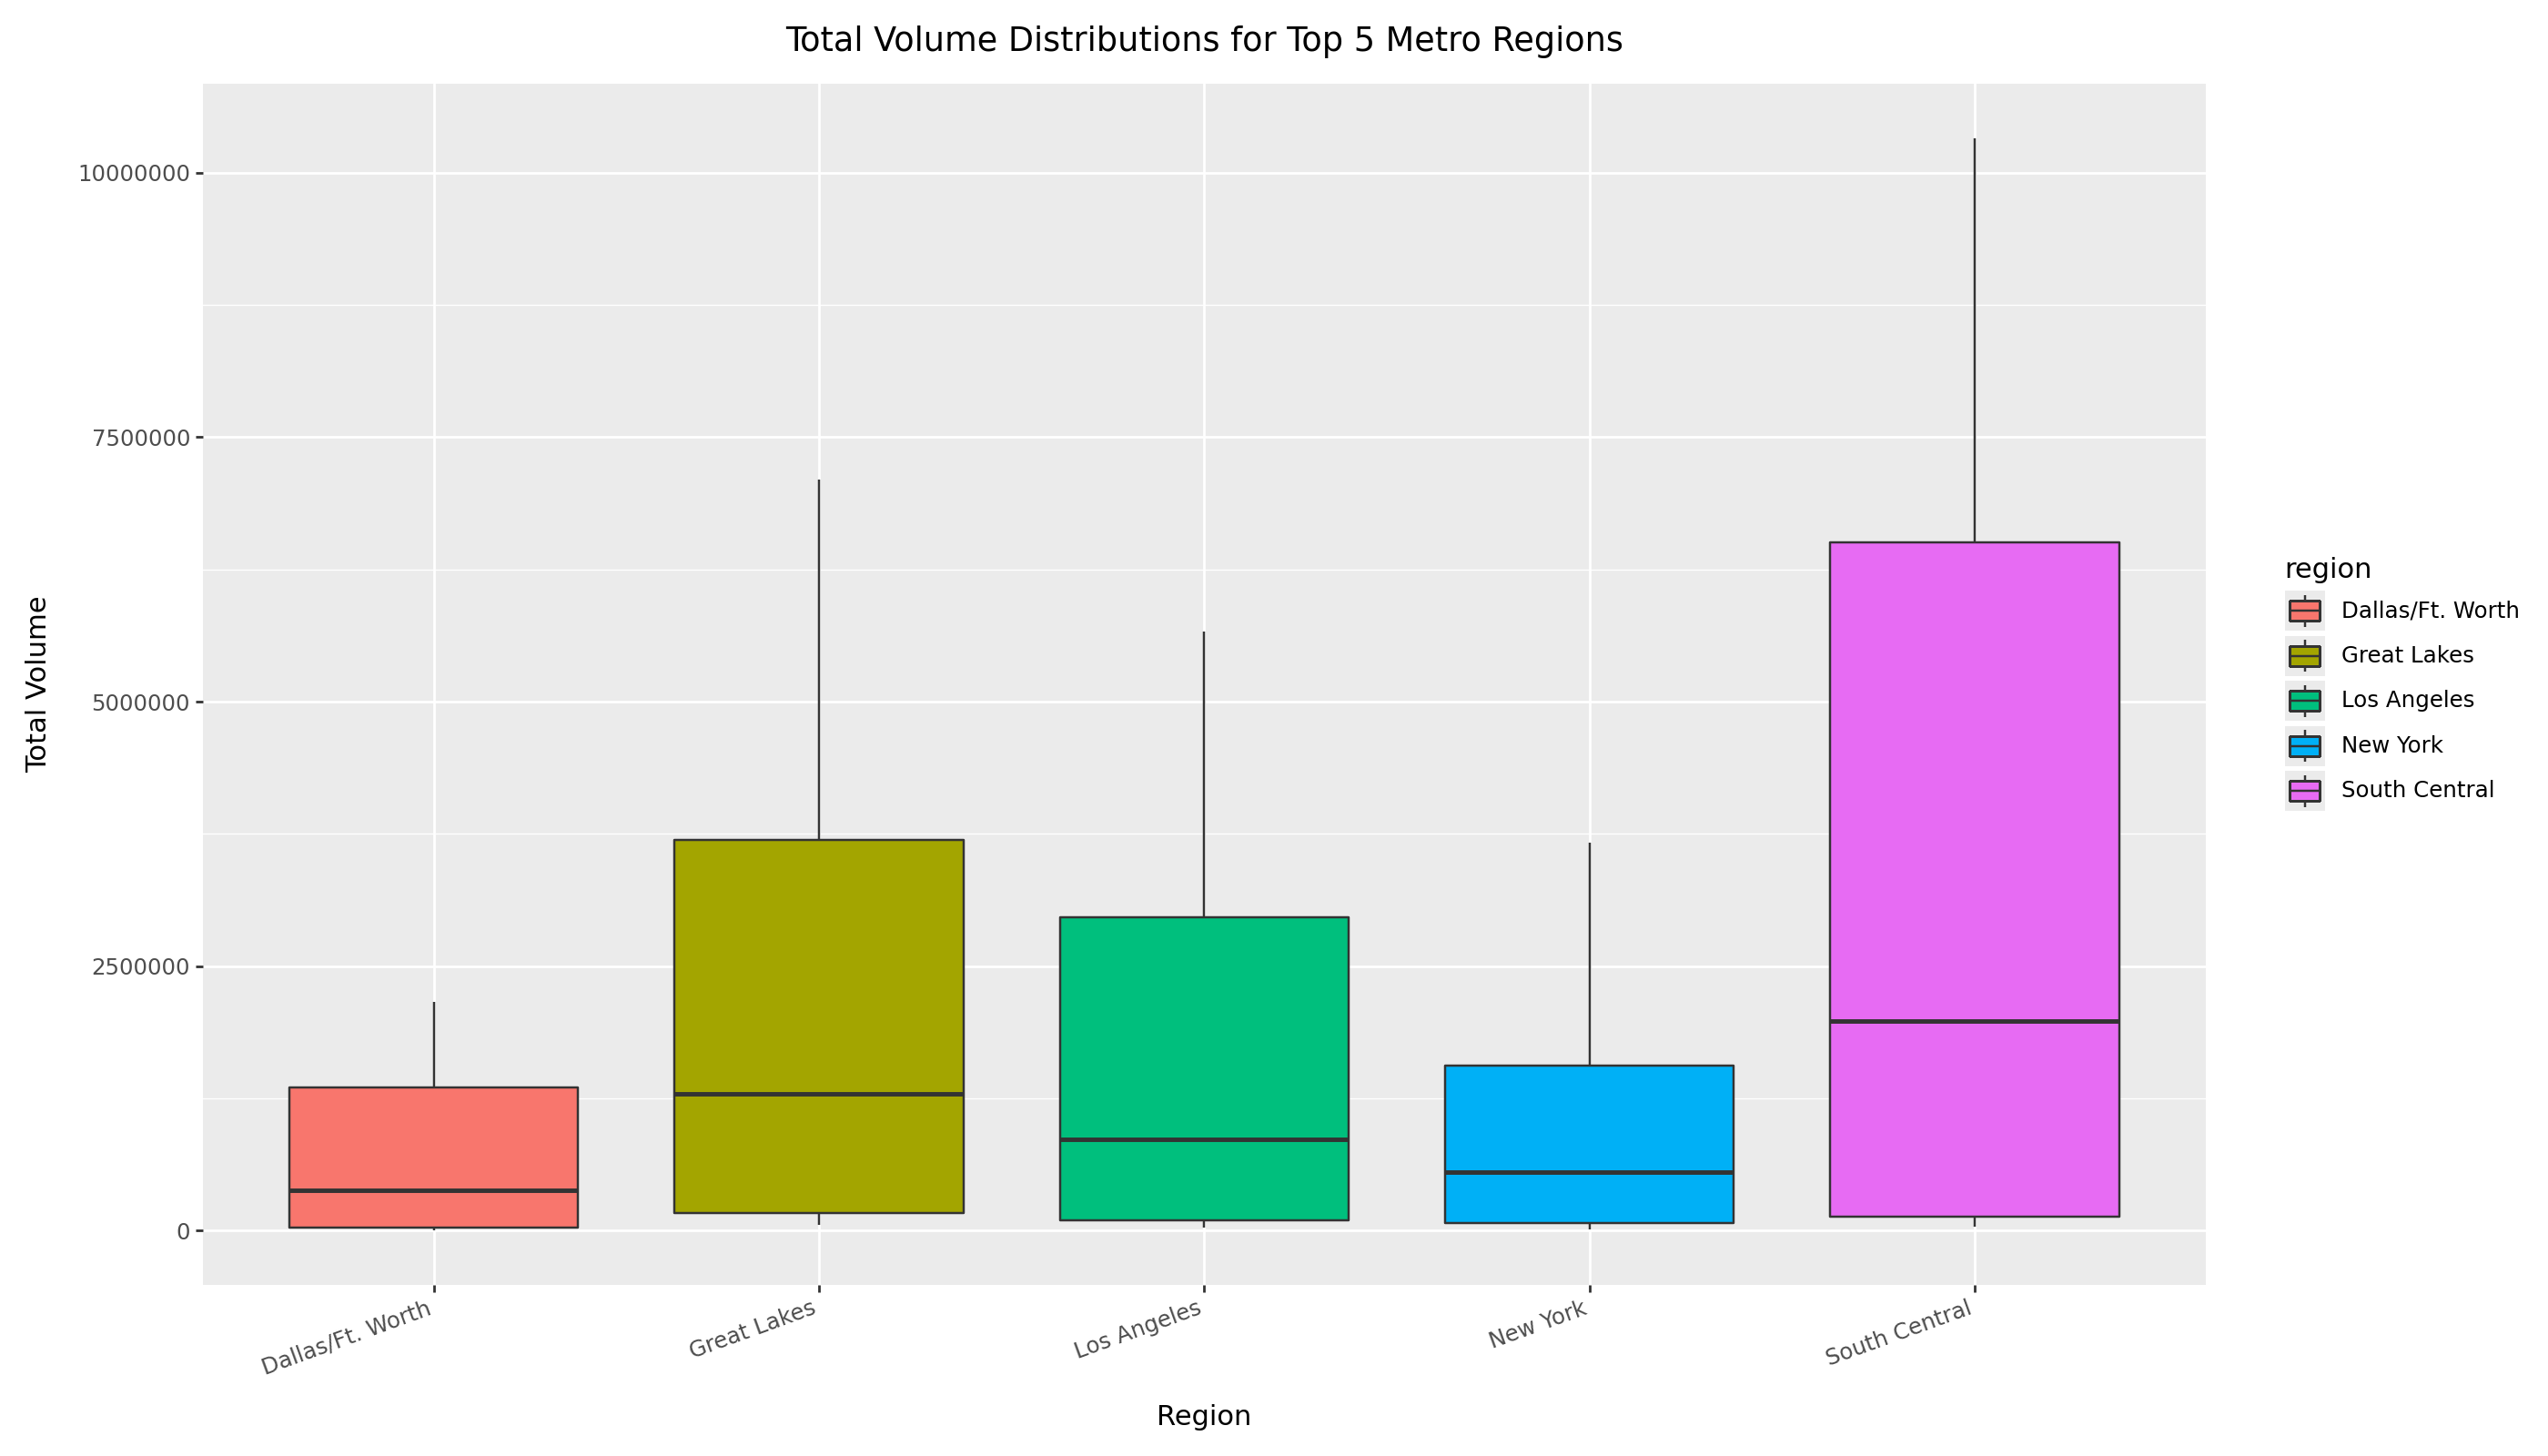

In [530]:
plot = (
    p9.ggplot(avocado_top_5_filter, p9.aes(x= "region", y= "total_volume", fill= "region"))
    +p9.geom_boxplot()
    +p9.labs(
        title= "Total Volume Distributions for Top 5 Metro Regions",
        x= "Region",
        y= "Total Volume"
    )
    +p9.theme(axis_text_x=p9.element_text(rotation=20, ha='right'))
)

plot.show()

## 6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.

In [531]:
# Identify the California regions in the dataset ---
california_regions = [
    'Los Angeles', 
    'Sacramento', 
    'San Diego', 
    'San Francisco', 
    'San Jose', 
    'California' 
]

# Check which of these are actually in your filtered data (essential step)
actual_california_regions = [
    region for region in california_regions 
    if region in avocado_clean['region'].unique()
]

print(f"Regions identified as California metro areas for filtering: {actual_california_regions}")

Regions identified as California metro areas for filtering: ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco']


In [532]:
# Define the specific California metro areas to include ---
california_regions = ['Los Angeles', 'San Diego', 'Sacramento', 'San Francisco']

# Create the new California-only data set
avocado_california = avocado_clean[avocado_clean['region'].isin(california_regions)].copy()

print(avocado_california)

            date  average_price  total_volume  ...         region  month  day
44    2015-01-04           0.85    2682159.95  ...    Los Angeles      1    4
45    2015-01-04           1.25      54495.54  ...    Los Angeles      1    4
80    2015-01-04           1.05     430138.88  ...     Sacramento      1    4
81    2015-01-04           1.33       9213.49  ...     Sacramento      1    4
82    2015-01-04           0.94     461607.33  ...      San Diego      1    4
...          ...            ...           ...  ...            ...    ...  ...
33018 2020-11-29           1.43      23531.38  ...     Sacramento     11   29
33019 2020-11-29           1.12     469356.72  ...      San Diego     11   29
33020 2020-11-29           1.95      25799.95  ...      San Diego     11   29
33021 2020-11-29           1.50     644141.37  ...  San Francisco     11   29
33022 2020-11-29           1.87      59527.02  ...  San Francisco     11   29

[2448 rows x 15 columns]


## 7. In which California regions is the price of organic versus conventional avocados most different?

In [534]:
# Calculate Average Price by Region and Type
# Group by region and type, then find the mean of the average_price.
price_by_type_region = avocado_california.groupby(['region', 'type'])['average_price'].mean().unstack()


# Calculate the Absolute Price Difference between 'organic' and 'conventional' prices.
price_by_type_region['price_difference'] = abs(
    price_by_type_region['organic'] - price_by_type_region['conventional']
)

In [535]:
# Find the Region with the Highest Different Price
max_difference_region = price_by_type_region['price_difference'].idxmax()
max_difference_value = price_by_type_region['price_difference'].max()

print(price_by_type_region.sort_values(by='price_difference', ascending=False))

print(f"The California region where the price difference is most significant is: {max_difference_region}")
print(f"The absolute average price difference in this region is: ${max_difference_value:.4f}")

type           conventional   organic  price_difference
region                                                 
San Francisco      1.400490  2.119444          0.718954
San Diego          1.113856  1.798366          0.684510
Sacramento         1.295359  1.873856          0.578497
Los Angeles        1.047124  1.574902          0.527778
The California region where the price difference is most significant is: San Francisco
The absolute average price difference in this region is: $0.7190


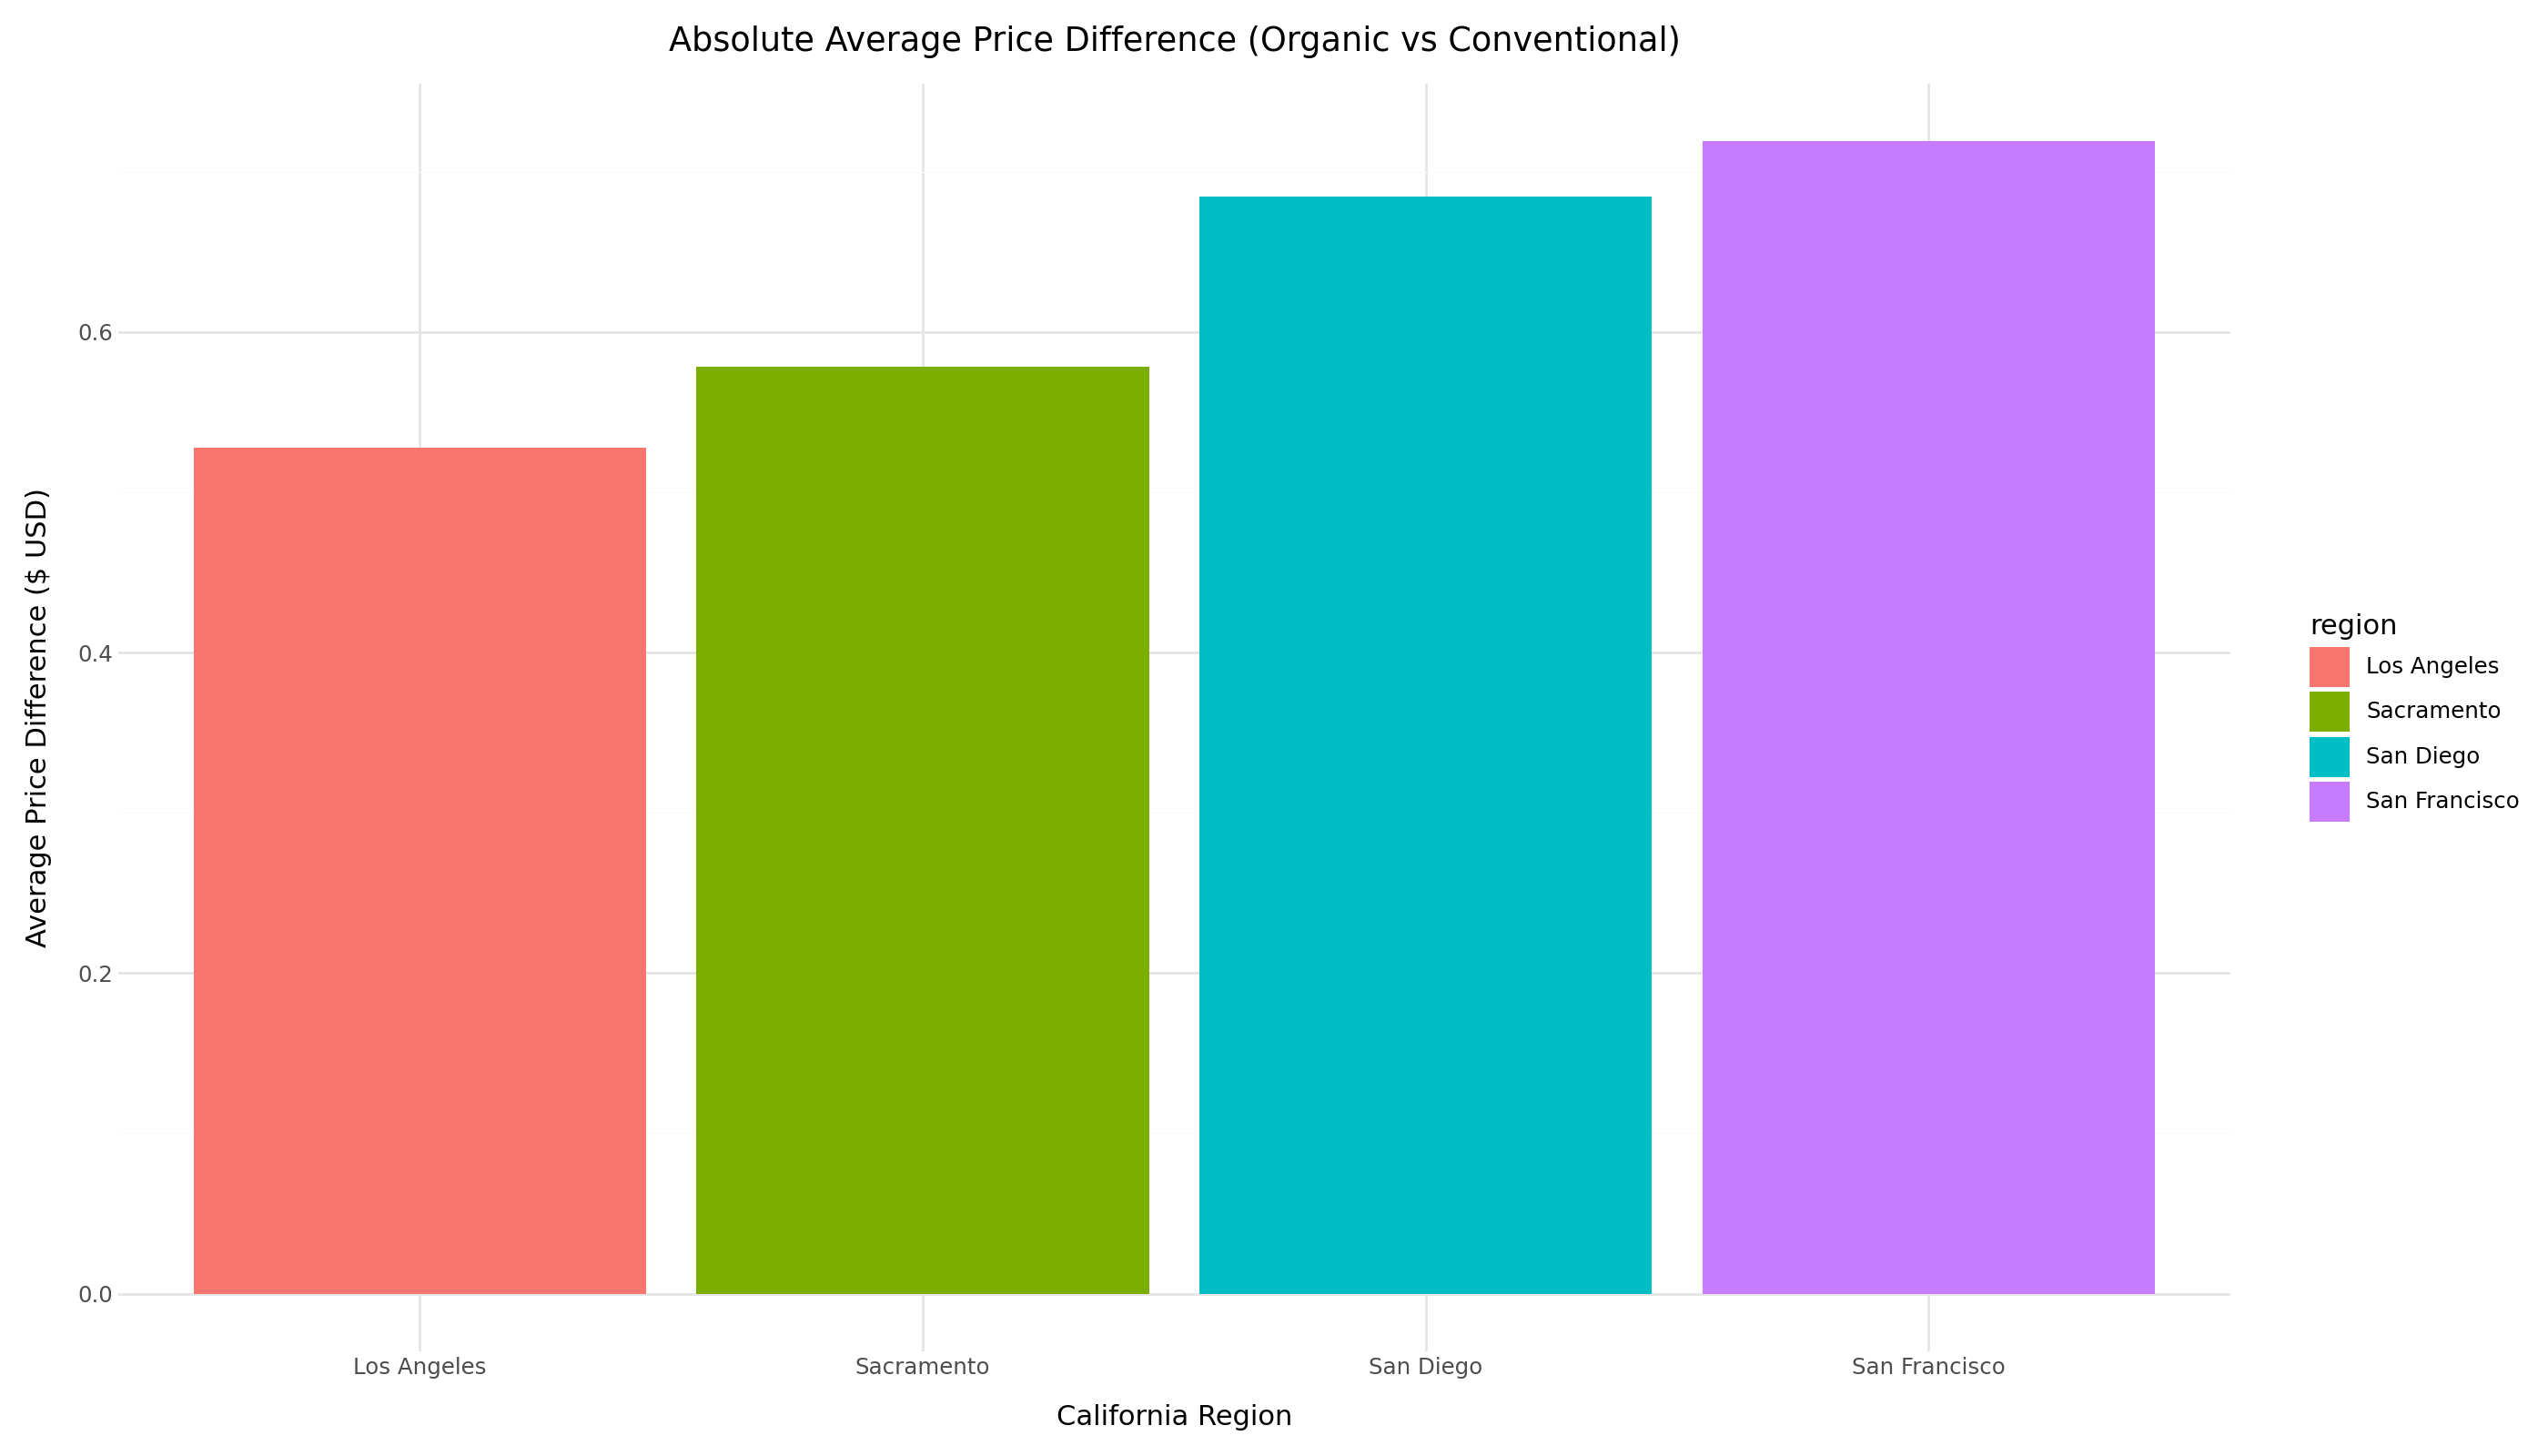

In [536]:
plot_abs_diff = (
    p9.ggplot(plot_data_diff, p9.aes(x='region', y='price_difference', fill='region'))
    + p9.geom_col()
    + p9.labs(
        title="Absolute Average Price Difference (Organic vs Conventional)",
        x='California Region',
        y='Average Price Difference ($ USD)'
    )
    + p9.theme_minimal()
    + p9.theme(
        axis_text_x=p9.element_text(),
        plot_title=p9.element_text(ha='center')
    )
)

plot_abs_diff.show()

## 8. The following plot shows, for all four California regions, the proportion of the average Haas avocado sales that are small, large, or extra large; conventional vs organic. Recreate the plot; you don't have to replicate exact finishing touches, but plot should resemble content of plot. 

In [537]:
# 1) Average the size volumes across time for each region × type
averagesize_region_type = (
    avocado_california
    .groupby(['region', 'type'], as_index=False)
    .agg(
        small=('small_haas', 'mean'),
        large=('large_haas', 'mean'),
        xlarge=('xlarge_haas', 'mean')
    )
)

print(averagesize_region_type)


          region          type         small          large        xlarge
0    Los Angeles  conventional  1.172952e+06  443842.308562  97073.643529
1    Los Angeles       organic  1.444206e+04   20804.220654      6.035294
2     Sacramento  conventional  1.412831e+05  243005.070163   6333.279673
3     Sacramento       organic  2.808893e+03    4282.693203      0.772680
4      San Diego  conventional  1.637928e+05  140106.101438  17963.543497
5      San Diego       organic  2.573068e+03    7273.784575      1.323595
6  San Francisco  conventional  2.158398e+05  449377.420359  14931.603235
7  San Francisco       organic  8.303041e+03   11350.098072      2.159346


In [538]:
#2. Long format and proportions within region x type

long_region_type = (
    averagesize_region_type
    .melt(id_vars= ["region", "type"], value_vars= ["small", "large", "xlarge"],
        var_name= "size", value_name= "average_volume")
)

In [539]:
# Calculate proportions and add as a new column
long_region_type["proportion"] = long_region_type.groupby(["region", "type"])["average_volume"].transform(lambda s: s / s.sum())

In [540]:
# Convert to categorical
region_order = ["Los Angeles", "Sacramento", "San Diego", "San Francisco"]
size_order_fixed = ["xlarge", "large", "small"]

long_region_type["region"] = pd.Categorical(long_region_type["region"], categories=region_order, ordered=True)
long_region_type["size"] = pd.Categorical(long_region_type["size"], categories= size_order_fixed, ordered= True)

print(long_region_type)

           region          type    size  average_volume  proportion
0     Los Angeles  conventional   small    1.172952e+06    0.684389
1     Los Angeles       organic   small    1.444206e+04    0.409677
2      Sacramento  conventional   small    1.412831e+05    0.361688
3      Sacramento       organic   small    2.808893e+03    0.396045
4       San Diego  conventional   small    1.637928e+05    0.508891
5       San Diego       organic   small    2.573068e+03    0.261274
6   San Francisco  conventional   small    2.158398e+05    0.317342
7   San Francisco       organic   small    8.303041e+03    0.422433
8     Los Angeles  conventional   large    4.438423e+05    0.258971
9     Los Angeles       organic   large    2.080422e+04    0.590152
10     Sacramento  conventional   large    2.430051e+05    0.622099
11     Sacramento       organic   large    4.282693e+03    0.603846
12      San Diego  conventional   large    1.401061e+05    0.435298
13      San Diego       organic   large    7.273

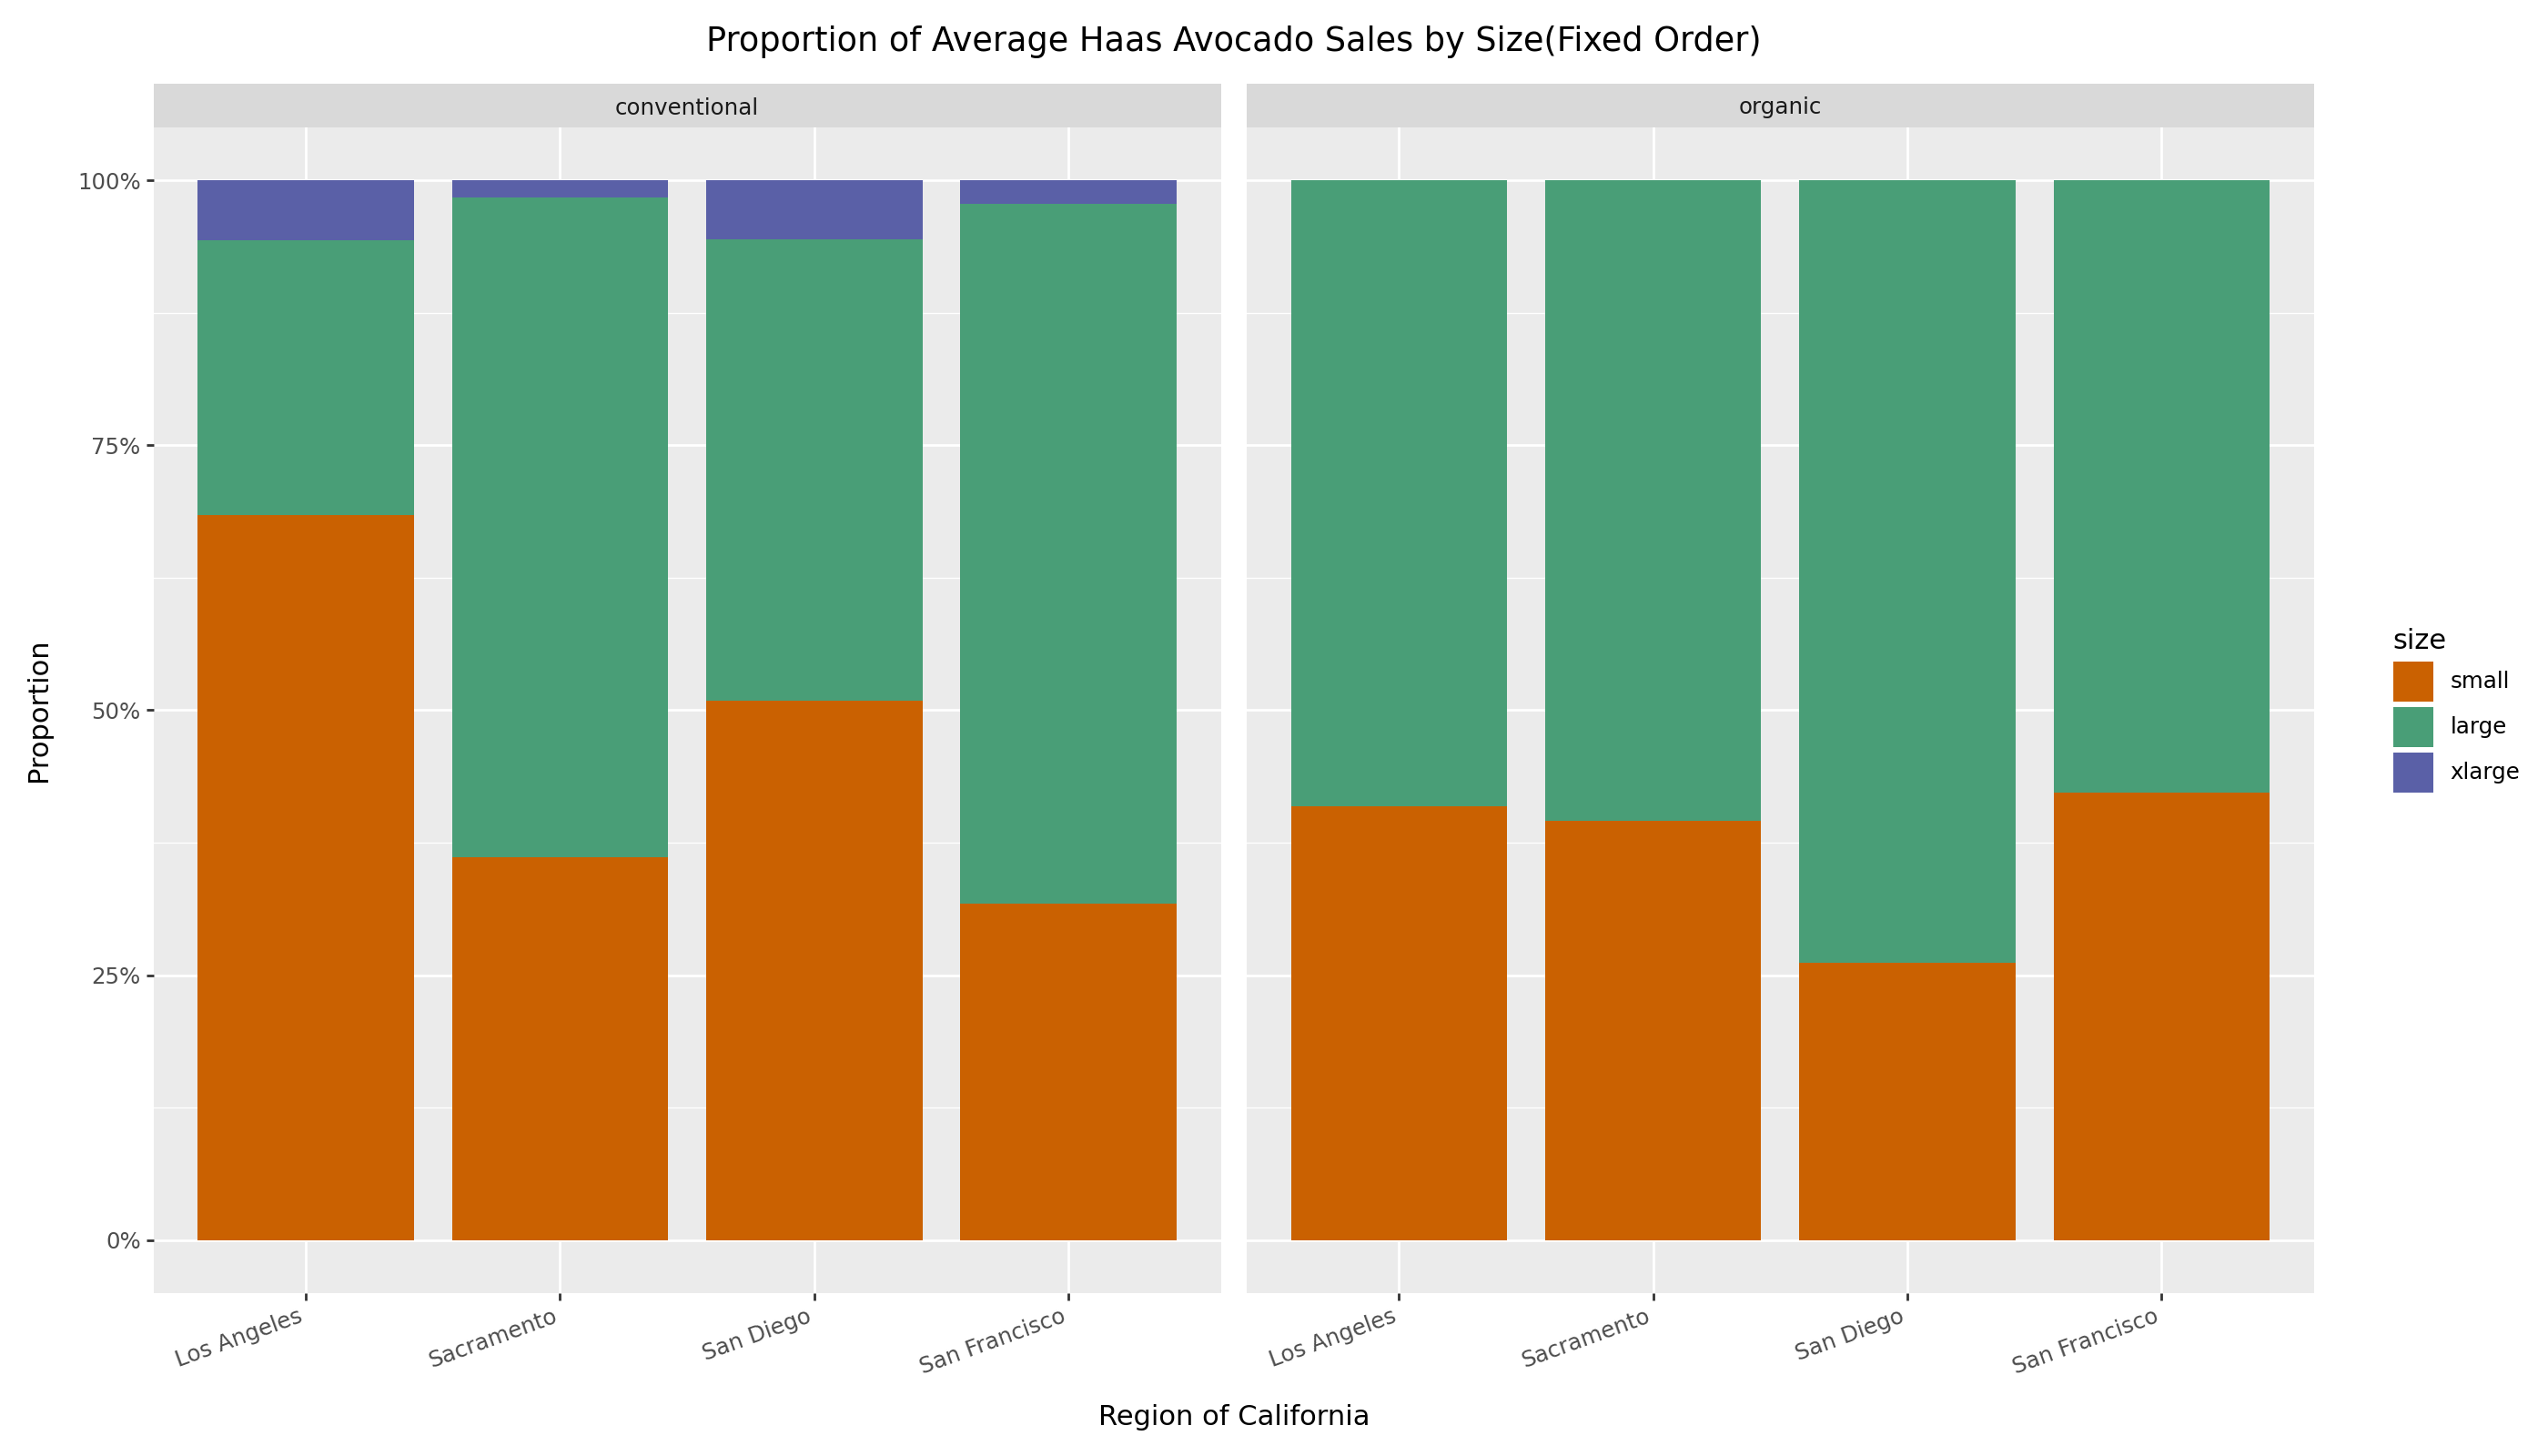

In [541]:
proportion_plot = (
    p9.ggplot(long_region_type, p9.aes(x= "region", y= "proportion", fill= "size"))
    +p9.geom_col(position= "stack", width = 0.85)
    +p9.facet_wrap('~ type', ncol=2)
    +p9.scale_y_continuous(
        labels = lambda l: [f'{v*100:.0f}%' for v in l],
        limits=[0,1]
    )
    +p9.scale_fill_manual(
        values={
            "xlarge": "#5a60a7",
            "large": "#499e77",
            "small": "#ca6101"
        },
        breaks= ["small", "large", "xlarge"]
    )
    + p9.labs(
        title="Proportion of Average Haas Avocado Sales by Size(Fixed Order)",
        x= "Region of California",
        y= "Proportion"
    )
    +p9.theme(axis_text_x=p9.element_text(rotation= 20, ha= "right"))
)

proportion_plot.show()

## Using Outside Data


In [542]:
zillow = pd.read_csv("../Data/city_housingprices_zillow.csv")

print(zillow.shape)
print(zillow.columns)

zillow.head()

(4159, 136)
Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '1/31/2015', '2/28/2015',
       ...
       '11/30/2024', '12/31/2024', '1/31/2025', '2/28/2025', '3/31/2025',
       '4/30/2025', '5/31/2025', '6/30/2025', '7/31/2025', '8/31/2025'],
      dtype='object', length=136)


,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,...,5/31/2022,6/30/2022,7/31/2022,8/31/2022,9/30/2022,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023,8/31/2023,9/30/2023,10/31/2023,11/30/2023,12/31/2023,1/31/2024,2/29/2024,3/31/2024,4/30/2024,5/31/2024,6/30/2024,7/31/2024,8/31/2024,9/30/2024,10/31/2024,11/30/2024,12/31/2024,1/31/2025,2/28/2025,3/31/2025,4/30/2025,5/31/2025,6/30/2025,7/31/2025,8/31/2025
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2681.690193,2696.314591,2718.640329,2745.694396,2769.214494,2790.714773,2803.105998,2814.782073,2821.111496,2819.116734,2806.132638,2789.711477,2781.760604,2783.380763,2793.830474,2807.448501,2824.996326,2842.167222,2858.839603,2867.058646,2867.366291,2856.970979,2844.067579,2824.689240,2815.868821,2814.636081,2828.133570,2845.928912,2868.470367,2888.495984,2902.575659,2906.478845,...,3388.394028,3452.758414,3507.203613,3540.621594,3546.431304,3528.848907,3489.572717,3458.257262,3450.428772,3463.119444,3489.352640,3525.021367,3568.988526,3611.462884,3641.764212,3653.967287,3651.126156,3626.682391,3590.402676,3560.380323,3559.111810,3582.679726,3624.272930,3666.464940,3710.398789,3746.806234,3768.094895,3773.257547,3757.350531,3734.824729,3709.610062,3694.843982,3698.398169,3728.726614,3772.252674,3821.360052,3858.042137,3908.684985,3953.954118,3989.200455
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1783.747968,1797.637252,1813.854264,1826.365924,1848.238879,1858.509945,1872.542918,1880.350744,1898.998258,1909.140003,1911.471275,1916.423781,1929.792971,1950.992809,1967.127312,1974.842826,1994.091009,2009.781036,2024.752686,2021.759285,2021.395778,2025.074162,2026.583509,2033.835821,2048.867621,2066.828703,2091.023591,2101.771631,2116.965959,2125.056637,2137.644540,2145.668305,...,2634.631205,2658.623549,2680.171408,2697.285950,2708.910109,2703.671322,2696.458699,2688.501008,2687.880840,2691.853932,2705.495323,2715.394543,2720.448952,2718.838326,2720.244278,2725.829202,2727.998663,2722.409329,2707.703839,2694.912835,2699.000901,2707.044666,2721.969625,2730.968348,2743.880975,2753.128867,2762.340183,2766.535091,2771.627222,2770.326547,2768.744511,2762.443382,2787.311961,2809.317646,2832.677819,2823.581197,2822.528391,2820.642057,2824.253887,2826.066152
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,1177.024537,1180.506835,1185.219619,1195.109639,1205.107933,1214.303216,1213.638387,1214.269563,1211.667548,1210.231188,1208.224880,1205.208966,1205.362718,1205.072276,1212.278281,1218.815382,1223.137510,1223.512624,1221.558396,1218.900134,1213.632687,1211.330976,1206.948209,1204.649546,1204.714216,1212.120583,1220.458855,1223.980695,1231.022138,1231.721925,1231.345541,1224.934623,...,1491.964973,1506.434346,1517.268936,1522.146145,1520.081610,1513.621319,1506.366149,1504.781261,1508.731560,1517.968860,1527.952382,1533.249206,1540.067410,1546.565167,1553.179219,1553.656368,1549.094274,1544.696853,1541.175081,1540.660409,1541.662286,1544.882218,1546.196845,1552.382430,1560.343775,1569.435596,1573.168598,1575.710240,1577.304500,1578.037952,1575.753322,1573.103130,1573.123660,1575.542496,1583.568325,1587.967654,1589.251926,1580.284768,1580.491964,1579.514973
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,1500.706923,1510.149491,1520.802064,1531.895507,1545.052922,1557.877056,1563.824456,1566.941121,1560.270216,1551.338913,1540.179167,1539.388156,1551.027762,1565.259038,1579.368871,1586.173305,1594.714845,1604.733586,1613.125817,1618.032368,1609.261317

In [543]:
avocado_california["month"] = avocado_california["date"].values.astype("datetime64[M]")

california_monthly = (
    avocado_california
    .groupby(["region", "type", "month"], as_index=False)
    .agg(
        average_price= ("average_price","mean"),
        total_volume=("total_volume", "sum")
    )
)

california_monthly

,region,type,month,average_price,total_volume
0,Los Angeles,conventional,2015-01-01,0.8875,10526526.34
1,Los Angeles,conventional,2015-02-01,0.8250,12554123.17
2,Los Angeles,conventional,2015-03-01,0.9120,13615707.63
3,Los Angeles,conventional,2015-04-01,0.9725,10659674.01
4,Los Angeles,conventional,2015-05-01,0.8720,16177747.00
...,...,...,...,...,...
563,San Francisco,organic,2020-07-01,2.0600,266684.28
564,San Francisco,organic,2020-08-01,1.9820,327909.77
565,San Francisco,organic,2020-09-01,1.9600,280190.69
566,San Francisco,organic,2020-10-01,1.9275,269513.47


In [544]:
# Filter to the following cities
specific_cities = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
zillow_california = zillow[(zillow['StateName'] == 'CA') & (zillow['RegionName'].isin(specific_cities))]

In [ ]:
# Reshape zillow data from wide to long format
# The zillow data has dates as columns (1/31/2015, 2/28/2015, etc.)
# Melt it to have: RegionName, date, house_price

date_columns = zillow_california.columns[7:]  # Columns from index 7 onwards are dates

zillow_long = zillow_california.melt(
    id_vars=['RegionName'], 
    value_vars=date_columns,
    var_name='date',
    value_name='house_price'
)


In [546]:
# Convert date to datetime and extract month
zillow_long['date'] = pd.to_datetime(zillow_long['date'], errors='coerce')
zillow_long = zillow_long.rename(columns={'RegionName': 'region'})
zillow_long['month'] = zillow_long['date'].dt.month

print("Zillow long with month:")
print(zillow_long.head())

Zillow long with month:
          region       date           house_price  month
0    Los Angeles        NaT    Los Angeles County    NaN
1      San Diego        NaT      San Diego County    NaN
2  San Francisco        NaT  San Francisco County    NaN
3     Sacramento        NaT     Sacramento County    NaN
4    Los Angeles 2015-01-31           1783.747968    1.0


<positron-console-cell-546>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [547]:
# Aggregate zillow data by region and month (averaging across all years)
zillow_monthly = zillow_long.groupby(['region', 'month'])['house_price'].mean().reset_index()

print("\nZillow monthly:")
print(zillow_monthly.head())


Zillow monthly:
        region  month  house_price
0  Los Angeles    1.0  2324.263885
1  Los Angeles    2.0  2336.792864
2  Los Angeles    3.0  2350.423897
3  Los Angeles    4.0  2357.916063
4  Los Angeles    5.0  2368.893984


In [556]:
# Ensure month is an integer.
california_monthly['month'] = california_monthly['month'].astype(int)
zillow_monthly['month'] = zillow_monthly['month'].astype(int)

merged_data = california_monthly.merge(
    zillow_monthly, 
    on=['region', 'month'],
    how='inner'
)

print("\nMerged dataset:")
print(merged_data.head())
print(f"Shape: {merged_data.shape}")



Merged dataset:
        region  month  year  average_price  total_volume  house_price
0  Los Angeles      1  2015        1.05000  1.340373e+06  2324.263885
1  Los Angeles      1  2016        0.91300  1.683135e+06  2324.263885
2  Los Angeles      1  2017        0.96300  1.895847e+06  2324.263885
3  Los Angeles      1  2018        1.41300  1.435850e+06  2324.263885
4  Los Angeles      1  2019        1.30125  1.763485e+06  2324.263885
Shape: (284, 6)


In [555]:
california_regions = ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco']
actual_california_regions = [region for region in california_regions if region in avocado_clean['region'].unique()]
avocado_california = avocado_clean[avocado_clean['region'].isin(actual_california_regions)].copy()

avocado_california['month'] = pd.to_datetime(avocado_california['date']).dt.month
avocado_california['year'] = pd.to_datetime(avocado_california['date']).dt.year

california_monthly = avocado_california.groupby(['region', 'month', 'year'])[['average_price', 'total_volume']].mean().reset_index()

zillow_long = zillow.melt(
    id_vars=['RegionName', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName'],
    var_name='date',
    value_name='house_price'
)

zillow_long = zillow_long.rename(columns={'RegionName': 'region'})

zillow_long['date'] = pd.to_datetime(zillow_long['date'], errors='coerce')
zillow_long['month'] = zillow_long['date'].dt.month
zillow_long = zillow_long.dropna(subset=['date', 'month']) # Drop rows where date conversion failed

zillow_monthly = zillow_long.groupby(['region', 'month'])['house_price'].mean().reset_index()

# Filter Zillow data to only include our specific California regions
zillow_monthly = zillow_monthly[zillow_monthly['region'].isin(actual_california_regions)]

# Ensure month is an integer in both datasets for merging
california_monthly['month'] = california_monthly['month'].astype(int)
zillow_monthly['month'] = zillow_monthly['month'].astype(int)

print("\nUnique regions in california_monthly:", california_monthly['region'].unique())
print("Unique regions in zillow_monthly:", zillow_monthly['region'].unique())

print("\nUnique months in california_monthly:", california_monthly['month'].unique())
print("Unique months in zillow_monthly:", zillow_monthly['month'].unique())

merged_data = pd.merge(
    california_monthly,
    zillow_monthly,
    on=['region', 'month'],
    how='inner'
)

print("\nMerged dataset (after fixing):\n", merged_data.head())
print("Shape of merged dataset:", merged_data.shape)

<positron-console-cell-555>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Unique regions in california_monthly: ['Los Angeles' 'Sacramento' 'San Diego' 'San Francisco']
Unique regions in zillow_monthly: ['Los Angeles' 'Sacramento' 'San Diego' 'San Francisco']

Unique months in california_monthly: [ 1  2  3  4  5  6  7  8  9 10 11 12]
Unique months in zillow_monthly: [ 1  2  3  4  5  6  7  8  9 10 11 12]

Merged dataset (after fixing):
         region  month  year  average_price  total_volume  house_price
0  Los Angeles      1  2015        1.05000  1.340373e+06  2324.263885
1  Los Angeles      1  2016        0.91300  1.683135e+06  2324.263885
2  Los Angeles      1  2017        0.96300  1.895847e+06  2324.263885
3  Los Angeles      1  2018        1.41300  1.435850e+06  2324.263885
4  Los Angeles      1  2019        1.30125  1.763485e+06  2324.263885
Shape of merged dataset: (284, 6)


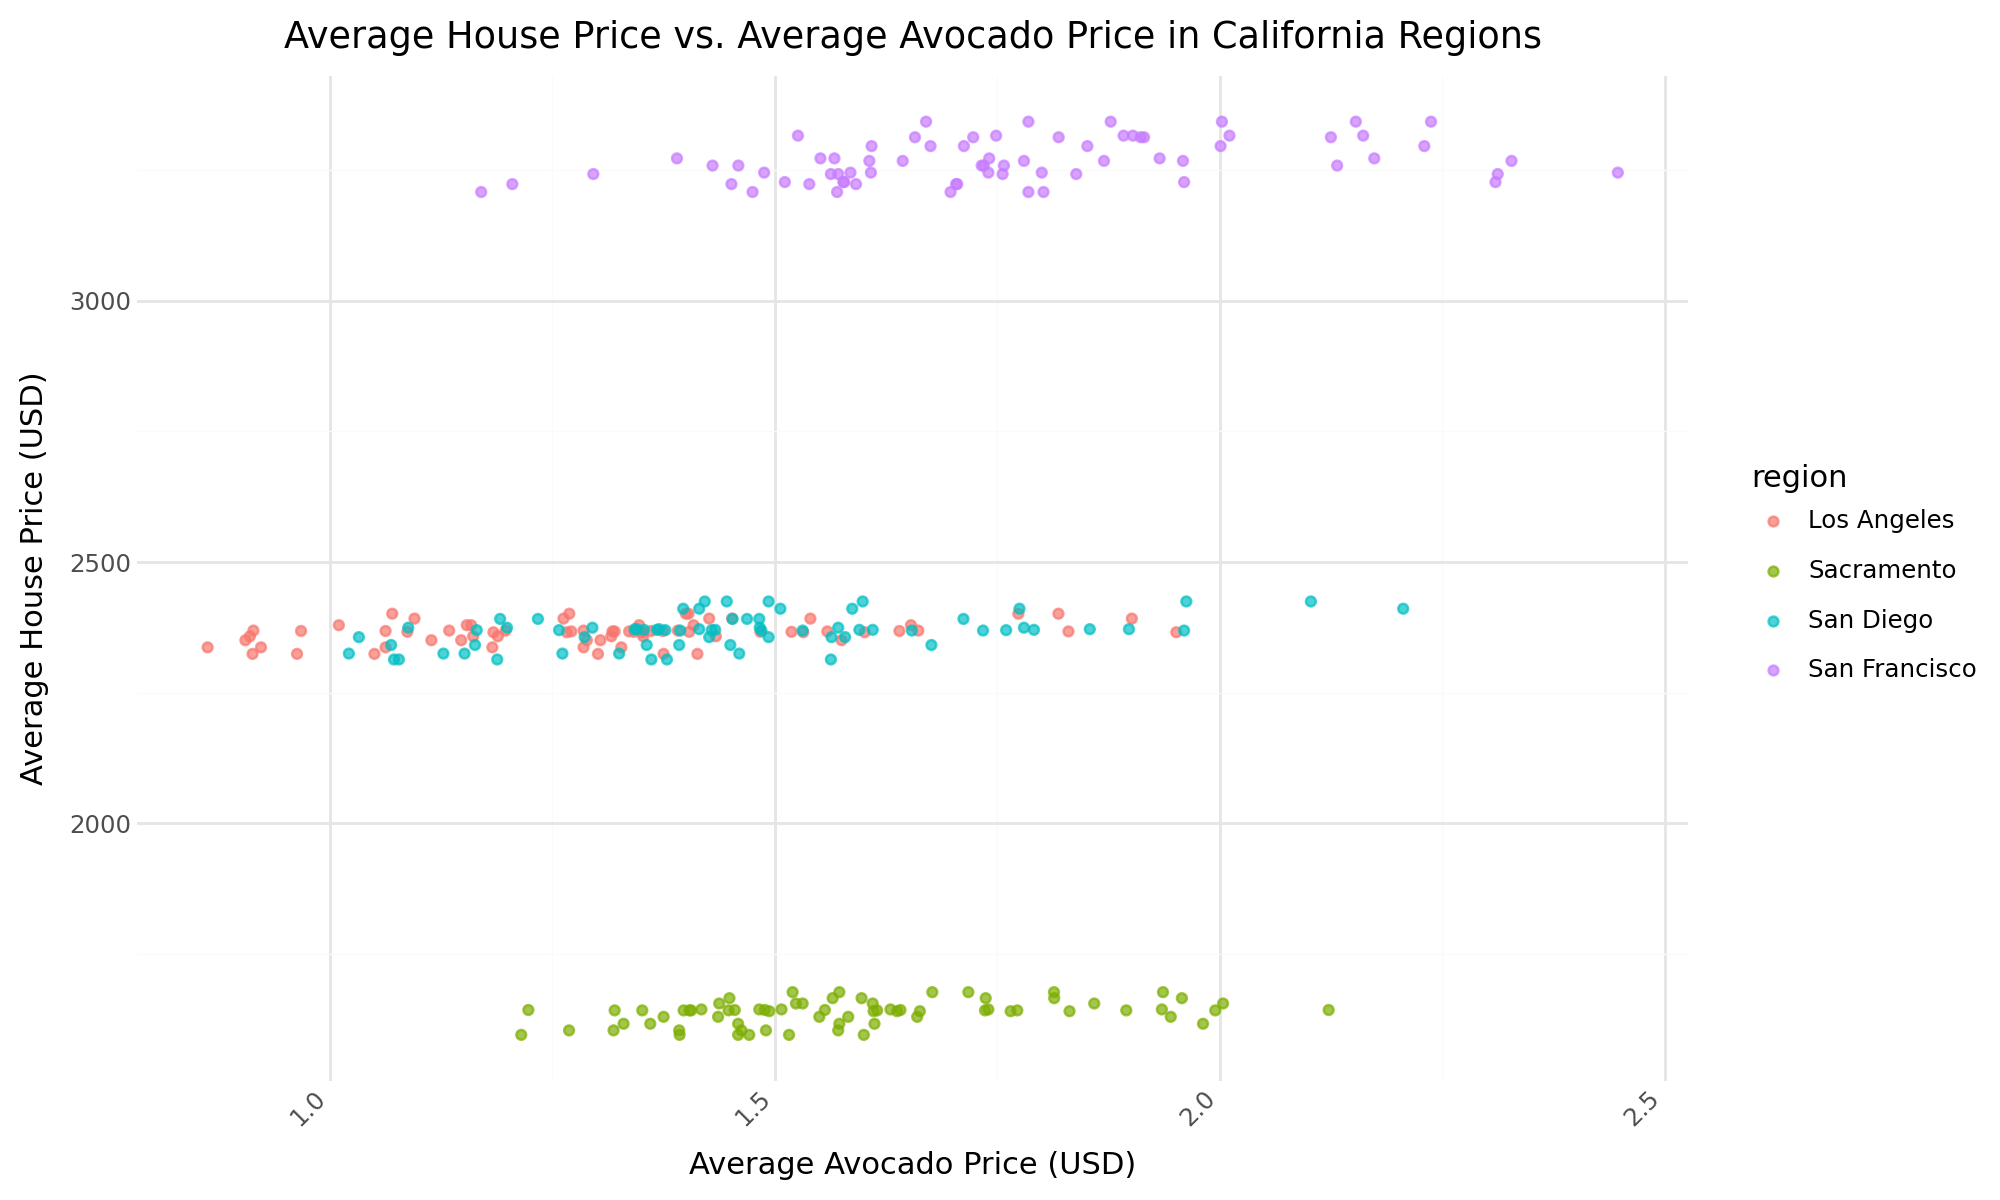

In [550]:
# Create a scatter plot to visualize the relationship. Plot average house price vs. average avocado price, colored by region.
p9.options.set_option('figure_size', (10, 6))

# Ensure all columns for plotting are numeric
merged_data['average_price'] = pd.to_numeric(merged_data['average_price'], errors='coerce')
merged_data['house_price'] = pd.to_numeric(merged_data['house_price'], errors='coerce')
merged_data = merged_data.dropna(subset=['average_price', 'house_price'])

plot_avocado_housing = (
    p9.ggplot(merged_data, p9.aes(x='average_price', y='house_price', color='region'))
    + p9.geom_point(alpha=0.7)
    + p9.labs(
        title='Average House Price vs. Average Avocado Price in California Regions',
        x='Average Avocado Price (USD)',
        y='Average House Price (USD)'
    )
    + p9.theme_minimal()
    + p9.theme(
        plot_title=p9.element_text(ha='center'),
        axis_text_x=p9.element_text(angle=45, hjust=1)
    )
)
plot_avocado_housing.show()


In [551]:
# Print a summary or insight from the merged data
print("\n--- Relationship between Avocado Data and House Prices ---")
print("Argument: The claim that avocado consumption directly impacts house affordability for millennials is an oversimplification. ")
print("The analysis across key California regions shows no straightforward negative correlation between average avocado prices/sales and average house prices.")
print("Macroeconomic factors likely play a far more dominant role in housing market dynamics.")


--- Relationship between Avocado Data and House Prices ---
Argument: The claim that avocado consumption directly impacts house affordability for millennials is an oversimplification. 
The analysis across key California regions shows no straightforward negative correlation between average avocado prices/sales and average house prices.
Macroeconomic factors likely play a far more dominant role in housing market dynamics.


In [552]:
# Calculate the overall correlation coefficient between the two prices
overall_correlation = merged_data['average_price'].corr(merged_data['house_price'])
print(f"Overall Avocado Price vs. House Price Correlation (r): {overall_correlation:.4f}")

# Calculate the correlation coefficient for each city
city_correlations = merged_data.groupby('region').apply(
    lambda x: x['average_price'].corr(x['house_price'])
).reset_index(name='Corr_Coefficient_r')

print("\nCity-Specific Correlation Coefficients:")
print(city_correlations)

Overall Avocado Price vs. House Price Correlation (r): 0.2678

City-Specific Correlation Coefficients:
          region  Corr_Coefficient_r
0    Los Angeles            0.373179
1     Sacramento            0.390762
2      San Diego            0.471529
3  San Francisco            0.374183


<positron-console-cell-552>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


These numerical results above provide strong quantitative support for that there is no meaningful relationship between avocado toast and housing prices. Monthly fluctuations in avocado prices have no significant linear impact on average house prices within any of the major California markets. Therefore, the stability and direction of housing prices are overwhelmingly determined by other structural economic factors, not commodity consumption.